In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Smoking Data.csv')

In [3]:
df

,region,age,sex,bmi,children,smoker
0,southwest,19,female,27.900,0,yes
1,southeast,18,male,33.770,1,no
2,southeast,28,male,33.000,3,no
3,northwest,33,male,22.705,0,no
4,northwest,32,male,28.880,0,no
...,...,...,...,...,...,...
1333,northwest,50,male,30.970,3,no
1334,northeast,18,female,31.920,0,no
1335,southeast,18,female,36.850,0,no
1336,southwest,21,female,25.800,0,no


In [4]:
df.isnull().sum()

region      0
age         0
sex         0
bmi         0
children    0
smoker      0
dtype: int64

In [5]:
df.info

<bound method DataFrame.info of          region  age     sex     bmi  children smoker
0     southwest   19  female  27.900         0    yes
1     southeast   18    male  33.770         1     no
2     southeast   28    male  33.000         3     no
3     northwest   33    male  22.705         0     no
4     northwest   32    male  28.880         0     no
...         ...  ...     ...     ...       ...    ...
1333  northwest   50    male  30.970         3     no
1334  northeast   18  female  31.920         0     no
1335  southeast   18  female  36.850         0     no
1336  southwest   21  female  25.800         0     no
1337  northwest   61  female  29.070         0    yes

[1338 rows x 6 columns]>

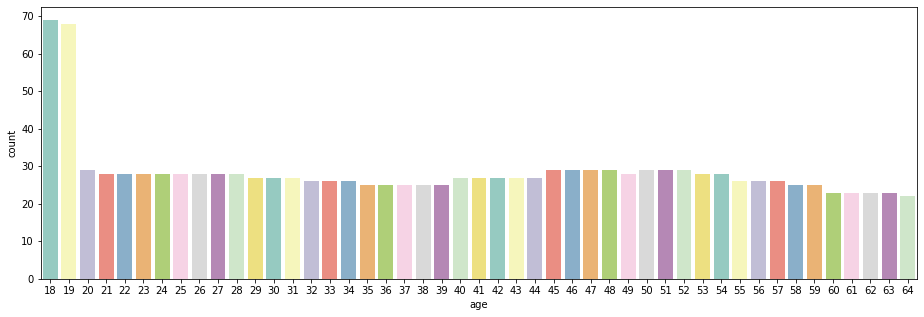

In [7]:
sns.countplot(x='age', data=df, palette="Set3")
from matplotlib import rcParams
rcParams['figure.figsize'] = 25,5

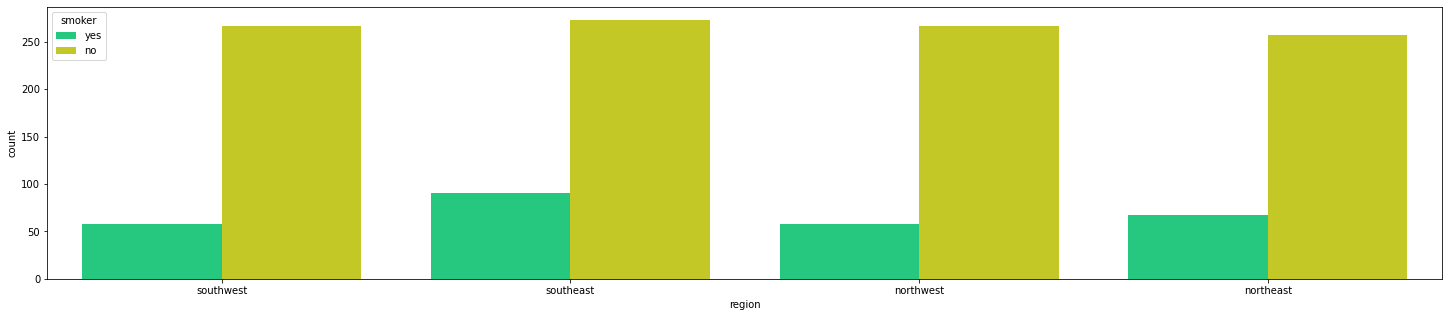

In [8]:
sns.countplot(x='region', hue='smoker', data=df,  palette=['#0be382',"#dce30b"] )
rcParams['figure.figsize'] = 15,5

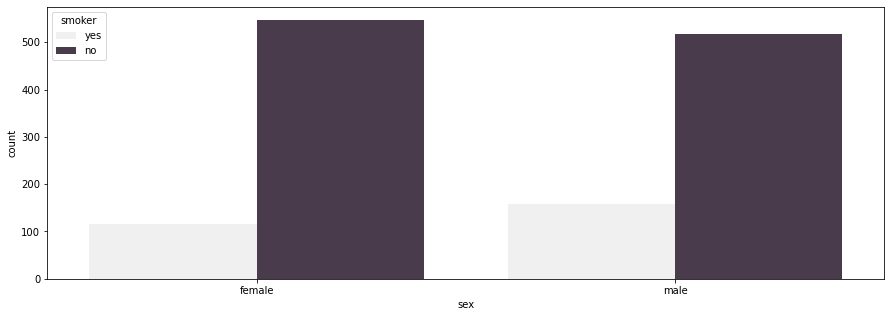

In [9]:
sns.countplot(x='sex', hue='smoker', data=df, color= "#4b374f")
rcParams['figure.figsize'] = 6,4

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
import numpy as np
from pandas.core.dtypes.common import is_numeric_dtype
for column in df.columns:
  if is_numeric_dtype(df[column]):
    continue
  else:
    df[column]=le.fit_transform(df[column])

In [12]:
df.head(3)

,region,age,sex,bmi,children,smoker
0,3,19,0,27.90,0,1
1,2,18,1,33.77,1,0
2,2,28,1,33.00,3,0


In [13]:
#Target
y=df['smoker']
y.head(5)

0    1
1    0
2    0
3    0
4    0
Name: smoker, dtype: int32

In [16]:
#Feature
x=df.copy()
x=df.drop('smoker', axis=1)
x.head(3)

,region,age,sex,bmi,children
0,3,19,0,27.90,0
1,2,18,1,33.77,1
2,2,28,1,33.00,3


In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.2, random_state=3)

In [74]:
x_train.count()

region      1070
age         1070
sex         1070
bmi         1070
children    1070
dtype: int64

In [75]:
x_test.count()

region      268
age         268
sex         268
bmi         268
children    268
dtype: int64

In [76]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()

# Fit the train data to the model

In [77]:
dtc.fit(x_train, y_train)

DecisionTreeClassifier()

In [78]:
y_pred = dtc.predict(x_test)

# MODEL ACCURACY and PERFORMANCE MEASUREMENT

In [79]:
from sklearn.metrics import confusion_matrix

In [80]:
#Predicted result
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0])

In [81]:
#Actual result
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0])

[Text(295.8561811641402, 530.6571428571428, 'sex <= 0.5\ngini = 0.324\nsamples = 1070\nvalue = [852, 218]'),
 Text(160.5575778659403, 504.7714285714286, 'bmi <= 28.542\ngini = 0.277\nsamples = 535\nvalue = [446, 89]'),
 Text(107.01635776882993, 478.8857142857143, 'age <= 63.5\ngini = 0.34\nsamples = 216\nvalue = [169, 47]'),
 Text(104.901720156324, 453.0, 'bmi <= 28.285\ngini = 0.332\nsamples = 214\nvalue = [169, 45]'),
 Text(87.15445878730459, 427.11428571428576, 'bmi <= 18.317\ngini = 0.314\nsamples = 205\nvalue = [165, 40]'),
 Text(77.08514921837991, 401.22857142857146, 'children <= 1.5\ngini = 0.5\nsamples = 6\nvalue = [3, 3]'),
 Text(74.97051160587398, 375.34285714285716, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(79.19978683088583, 375.34285714285716, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(97.22376835622927, 401.22857142857146, 'region <= 2.5\ngini = 0.303\nsamples = 199\nvalue = [162, 37]'),
 Text(83.42906205589767, 375.34285714285716, 'age <= 61.5\ngini = 0.34

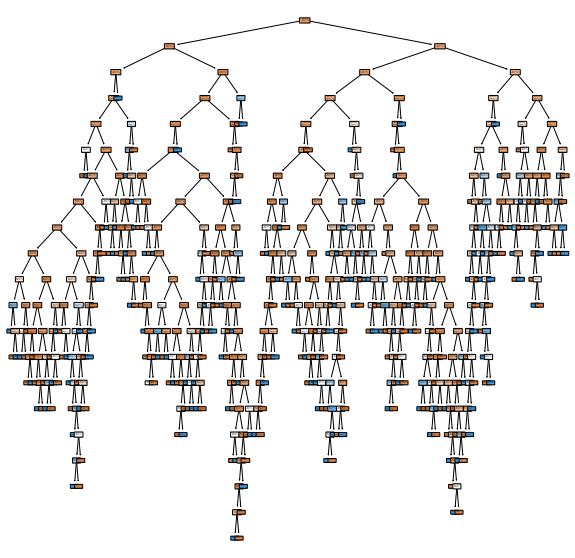

In [82]:
from sklearn import tree

plt.figure(figsize=(10,10))
tree.plot_tree(dtc,filled=True, rounded=True, feature_names=x.columns)

In [83]:
print(tree.export_text(dtc))

|--- feature_2 <= 0.50
|   |--- feature_3 <= 28.54
|   |   |--- feature_1 <= 63.50
|   |   |   |--- feature_3 <= 28.28
|   |   |   |   |--- feature_3 <= 18.32
|   |   |   |   |   |--- feature_4 <= 1.50
|   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |--- feature_4 >  1.50
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_3 >  18.32
|   |   |   |   |   |--- feature_0 <= 2.50
|   |   |   |   |   |   |--- feature_1 <= 61.50
|   |   |   |   |   |   |   |--- feature_1 <= 52.50
|   |   |   |   |   |   |   |   |--- feature_1 <= 36.50
|   |   |   |   |   |   |   |   |   |--- feature_3 <= 21.87
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |--- feature_3 >  21.87
|   |   |   |   |   |   |   |   |   |   

# Confusion Matrix

In [84]:
#Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[172,  40],
       [ 48,   8]], dtype=int64)

# Assign the TRUE POSITIVE, FALSE NEGATIVE, FALSE POSITIVE, TRUE NEGATIVE using Confsion Matrix

In [85]:
tp, fn, fp, tn = confusion_matrix(y_test, y_pred).reshape(-1)

In [86]:
tp

172

In [87]:
fn

40

In [88]:
fp

48

In [89]:
tn

8

# Accuracy

In [90]:
accuracy = (tp+tn)/len(y_test)
accuracy= accuracy*100
accuracy

67.16417910447761

In [72]:
accuracy= (tp+tn)/(tp+fp+tn+fn)
accuracy=accuracy*100
accuracy

67.16417910447761

In [91]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test, y_pred)
accuracy=accuracy*100
accuracy

67.16417910447761

#  Precision or Positive Predictive Value (PPV)

In [92]:
precision= tp/(tp+fp)
precision

0.7818181818181819

In [93]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average=None)

array([0.78181818, 0.16666667])

# Sensitivity, Recall, Hit rate or True Positive Rate (TPR)

In [94]:
recall= tp/(tp+fn)
recall

0.8113207547169812

In [95]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average=None)

array([0.81132075, 0.14285714])

# False Positive Rate (FPR)

In [96]:
fpr=fp/(fp+tn)
fpr

0.8571428571428571

# F1 Measure

In [97]:
f1_measure= (precision+recall)/2
f1_measure

0.7965694682675815

# Harmonic Mean or F1 Score

In [98]:
F1 = (2 * precision * recall)/(precision + recall)
F1

0.7962962962962964

In [99]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, average=None)

array([0.7962963 , 0.15384615])

# Specificity, Selectivity or True Negative Rate (TNR)

In [100]:
specificity= tn/(tn+fp)
specificity

0.14285714285714285

# Thread SCore (TS) Or Critical Success Inde(CSI)

In [101]:
csi = tp/(tp+fn+fp)
csi

0.6615384615384615

# False Discovery Rate (FDR)

In [102]:
fdr= fp/(tp+fp)
fdr

0.21818181818181817

In [104]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test, y_pred)
cm

array([[172,  40],
       [ 48,   8]], dtype=int64)

# Confusion Matrix Plot

Text(33.0, 0.5, 'Actual Values')

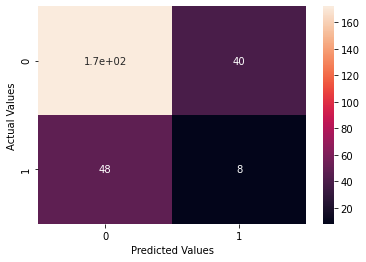

In [105]:
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

# Classification Report Summary

In [106]:
from sklearn.metrics import classification_report
class_r=classification_report(y_test, y_pred)
print(class_r)

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       212
           1       0.17      0.14      0.15        56

    accuracy                           0.67       268
   macro avg       0.47      0.48      0.48       268
weighted avg       0.65      0.67      0.66       268



# ROC and AUC Graph

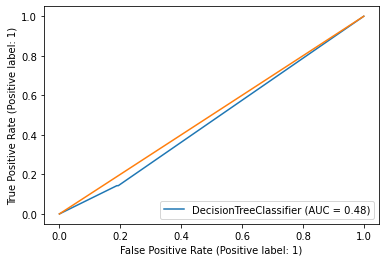

In [108]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(dtc,x_test, y_test)
plt.plot([0,1],[0,1])